# Mini project 2 

### Import data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
file_path= r"C:\IOD\DATA\SeoulBikeData.csv"
bike= pd.read_csv(file_path, encoding='ISO-8859-1')

### Explore Data

In [6]:
bike.shape

(8760, 14)

In [7]:
bike.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
import datetime as dt
# Convert Date Column to DateTime Format:
bike["Date"] = pd.to_datetime(bike["Date"], infer_datetime_format= True, format='mixed')
# Extract Year, Month, and Day:
bike["Date"].dt.year
bike["Date"].dt.month
bike["Date"].dt.day


bike["day"] = bike["Date"].dt.day_name()
bike["month"] = bike["Date"].dt.month
bike["year"] = bike["Date"].dt.year
# Drop the Original Date Column:
bike.drop("Date", axis=1, inplace=True)
bike.sample(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
1196,342,20,1.2,51,0.6,1544,-7.8,0.00,0.0,0.0,Winter,No Holiday,Yes,Friday,1,2018
5266,867,10,22.5,48,1.6,1940,10.9,2.33,0.0,0.0,Summer,No Holiday,Yes,Tuesday,8,2018
4270,1374,22,18.6,50,1.0,1830,7.9,0.00,0.0,0.0,Spring,No Holiday,Yes,Sunday,5,2018
8207,679,23,12.9,72,1.4,2000,7.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,Wednesday,7,2018
8607,330,15,3.7,78,2.0,1314,0.2,0.81,0.0,4.1,Autumn,No Holiday,Yes,Saturday,11,2018


In [9]:
#creating a new column of "weekdays_weekend" and drop the column "day","year"

bike['weekdays_weekend']=bike['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike=bike.drop(columns=['day','year'],axis=1)

In [10]:
bike['weekdays_weekend'].value_counts()

weekdays_weekend
0    6216
1    2544
Name: count, dtype: int64

In [11]:
bike.sample(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
6609,721,9,23.4,52,1.3,1997,12.9,1.53,0.0,0.0,Autumn,No Holiday,Yes,2,0
6399,405,15,24.0,94,3.1,1188,22.9,0.41,0.5,0.0,Summer,No Holiday,Yes,8,0
1625,227,17,-6.6,29,2.5,2000,-21.7,0.68,0.0,0.0,Winter,No Holiday,Yes,6,1
2108,483,20,4.3,32,1.7,1101,-10.9,0.00,0.0,0.0,Winter,No Holiday,Yes,2,0
242,67,2,-4.2,35,3.4,2000,-17.4,0.00,0.0,0.0,Winter,No Holiday,Yes,11,1


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int32

In [13]:
# change the hour, month, weekdays_weekend into category 
cols=['Hour', 'month', 'weekdays_weekend']
for col in cols:
    bike[col]= bike[col].astype('category')

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [15]:
bike.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [16]:
bike.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
weekdays_weekend             0
dtype: int64

In [17]:
bike.duplicated().sum()

0

### EDA

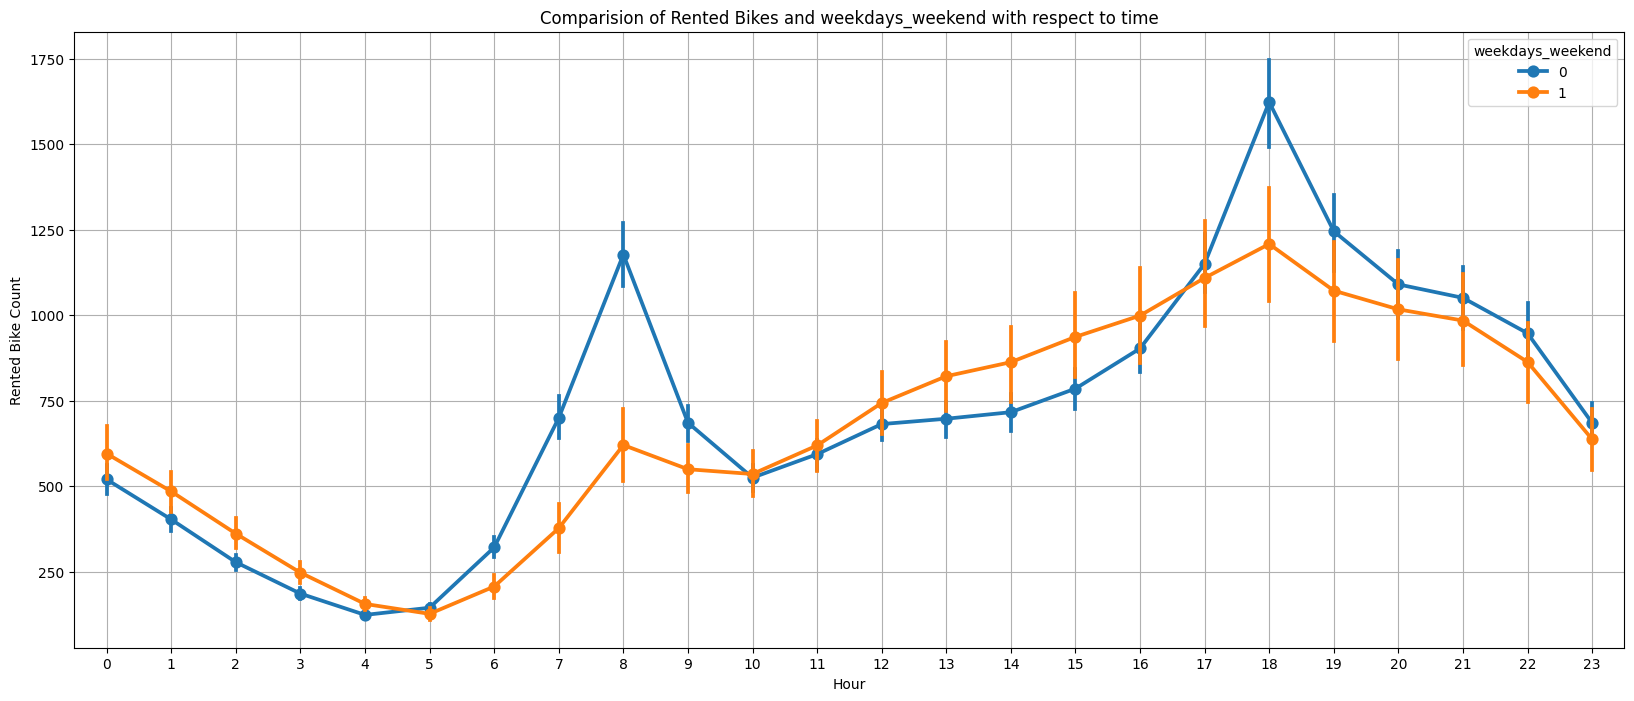

In [19]:
plt.figure(figsize = (20, 8))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='weekdays_weekend', data = bike)
plt.title("Comparision of Rented Bikes and weekdays_weekend with respect to time")
plt.grid()
plt.show()

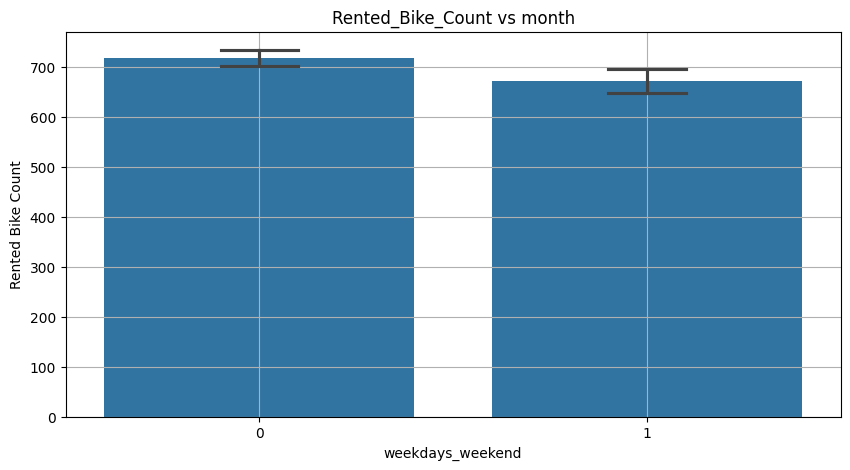

In [20]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "weekdays_weekend", y = "Rented Bike Count", data = bike, capsize = 0.2)
plt.title("Rented_Bike_Count vs month")
plt.grid()

Orange colour represent weekends and blue colour represent weekdays. In weekdays people generally rent more bikes than weekends. Maybe because people have to go to work. The peak times are around 7am to 9 am and between 5 to 7pm. 


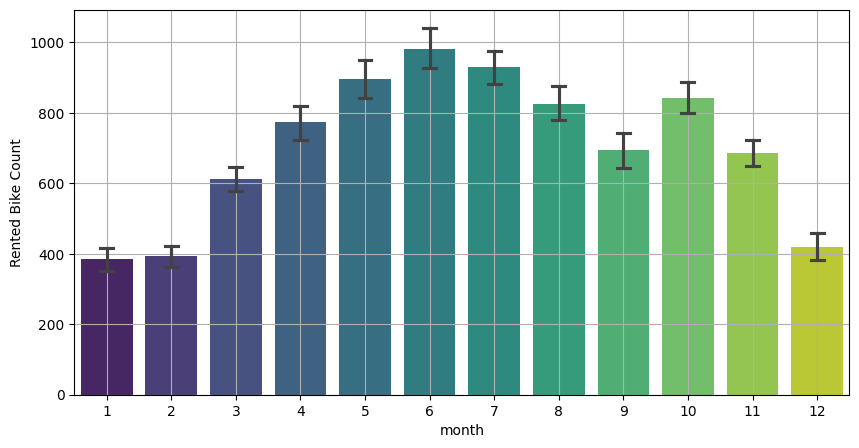

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x="month", y="Rented Bike Count", data=bike, capsize=0.2, palette="viridis")  
plt.grid(True)
plt.show()

Around May , June, July the demand for renting bike is high compared to other months. (These months are during summer season in Korea.)

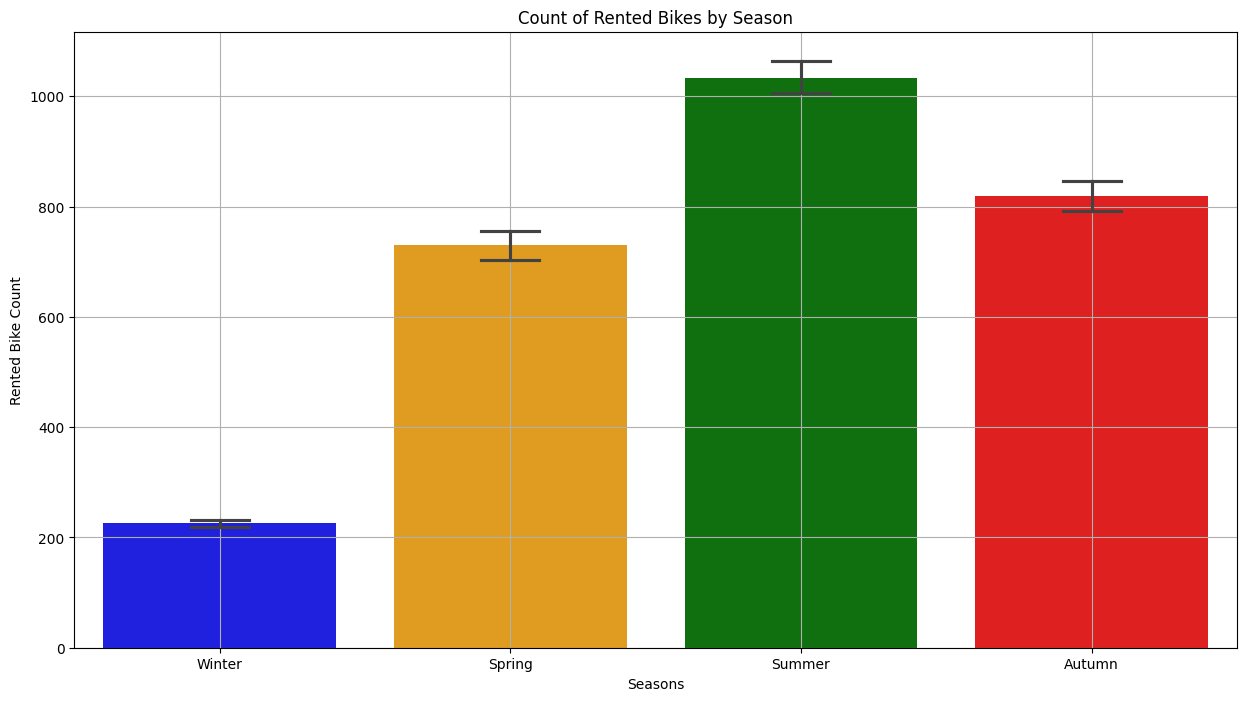

In [24]:
palette = {
    'Spring': 'orange',
    'Summer': 'green',
    'Autumn': 'red',
    'Winter': 'blue'
}

# Set the figure size
plt.figure(figsize=(15, 8))

# Create the bar plot with custom colors for each season
sns.barplot(x='Seasons', y='Rented Bike Count', data=bike, capsize=0.2, palette=palette)

# Set the title and grid
plt.title("Count of Rented Bikes by Season")
plt.grid(True)

# Show the plot
plt.show()

Highest demand of renting a bike during summer season. 

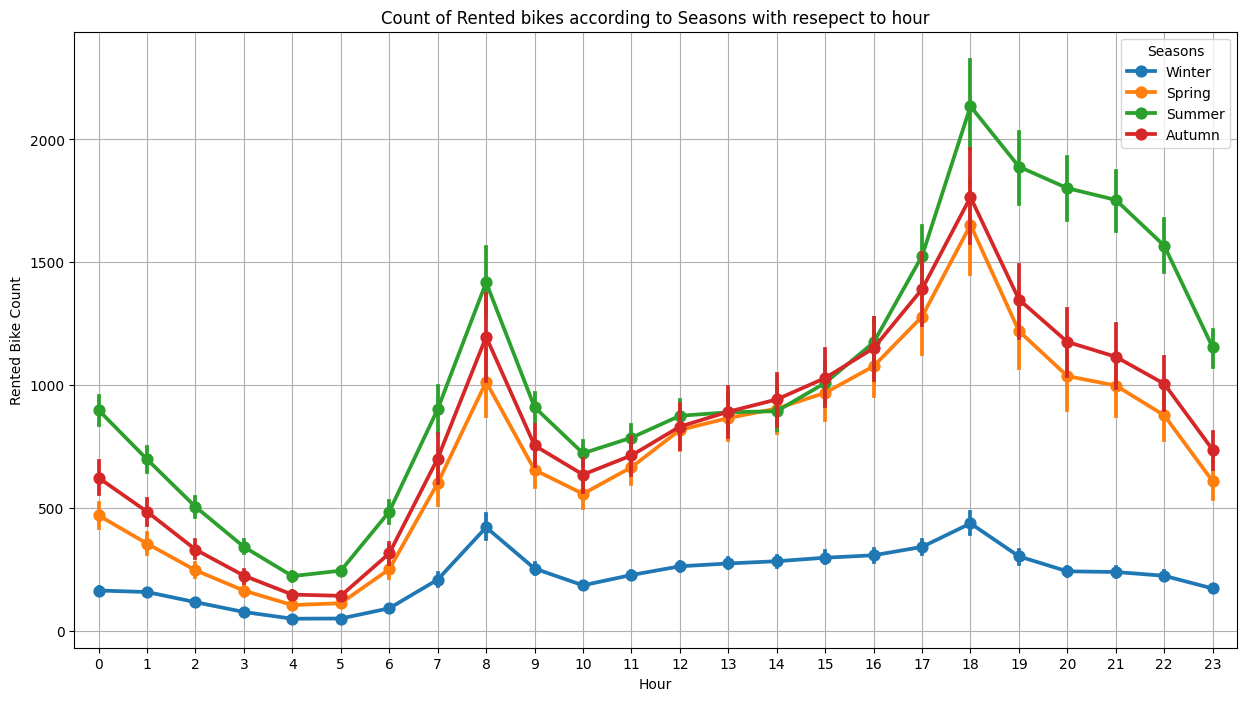

In [26]:
plt.figure(figsize = (15, 8))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Seasons', data = bike)
plt.title("Count of Rented bikes according to Seasons with resepect to hour")
plt.grid()
plt.show()

shows the use of rented bike in in four different seasons. Winter is shown as blue color, spring as orange, summer as green and autumn as red color. 
The peak time for renting looks quite similar for differnet seasons but in summer season the use of rented bike is the highest during 7am-9am and 5pm- 7pm.
In winter season the use of rented bike is very low because of snowfall.

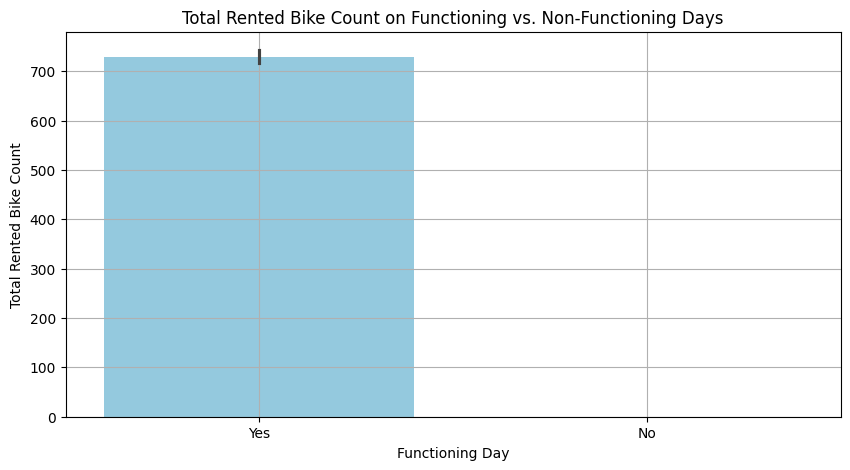

In [28]:
plt.figure(figsize=(10, 5))

# Create the bar plot
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=bike, color='skyblue')

# Set the title and labels
plt.title("Total Rented Bike Count on Functioning vs. Non-Functioning Days")
plt.xlabel("Functioning Day")
plt.ylabel("Total Rented Bike Count")

# Add grid
plt.grid(True)

# Show the plot
plt.show()

In [29]:
bike= bike.drop(bike[bike['Functioning Day']== 'No'].index)
bike = bike.drop(['Functioning Day'], axis=1)
bike.shape


(8465, 14)

As the data shows that rental bikes are only given on Functioning day so we can remove non-functioning day.

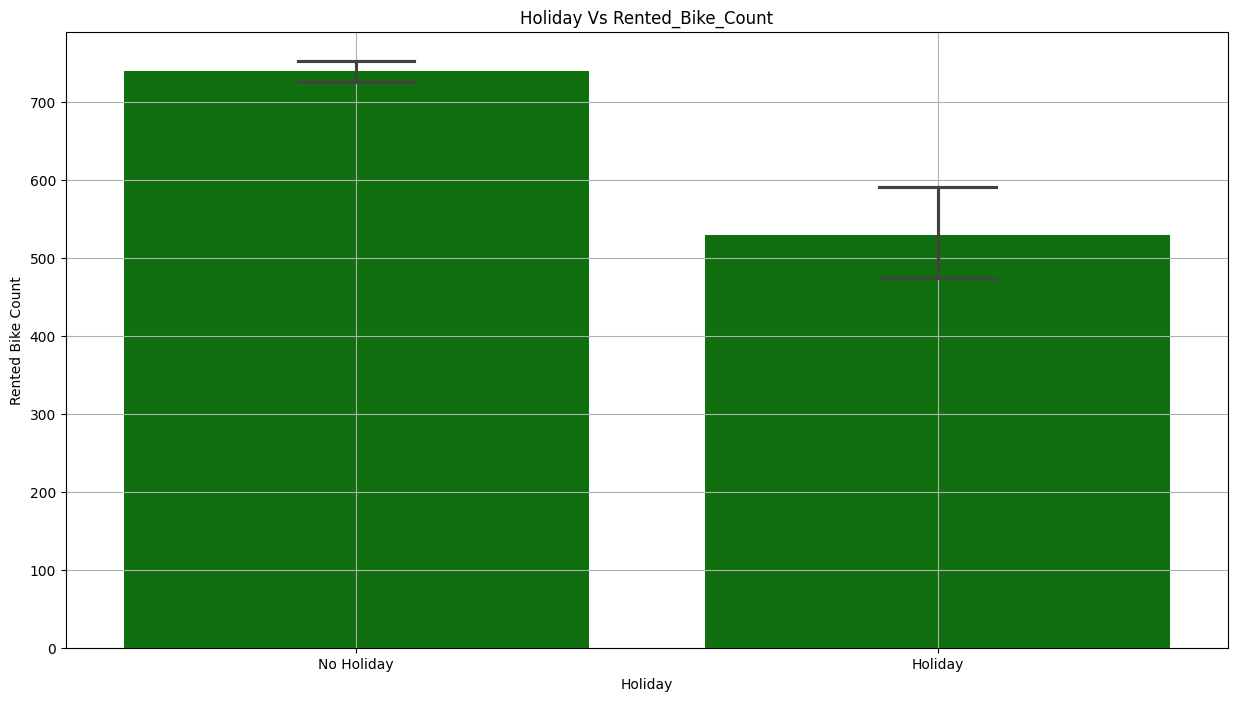

In [31]:
plt.figure(figsize = (15, 8))
sns.barplot(x='Holiday',y='Rented Bike Count', data = bike, capsize = 0.2, color="green")
plt.title("Holiday Vs Rented_Bike_Count")
plt.grid()
plt.show()

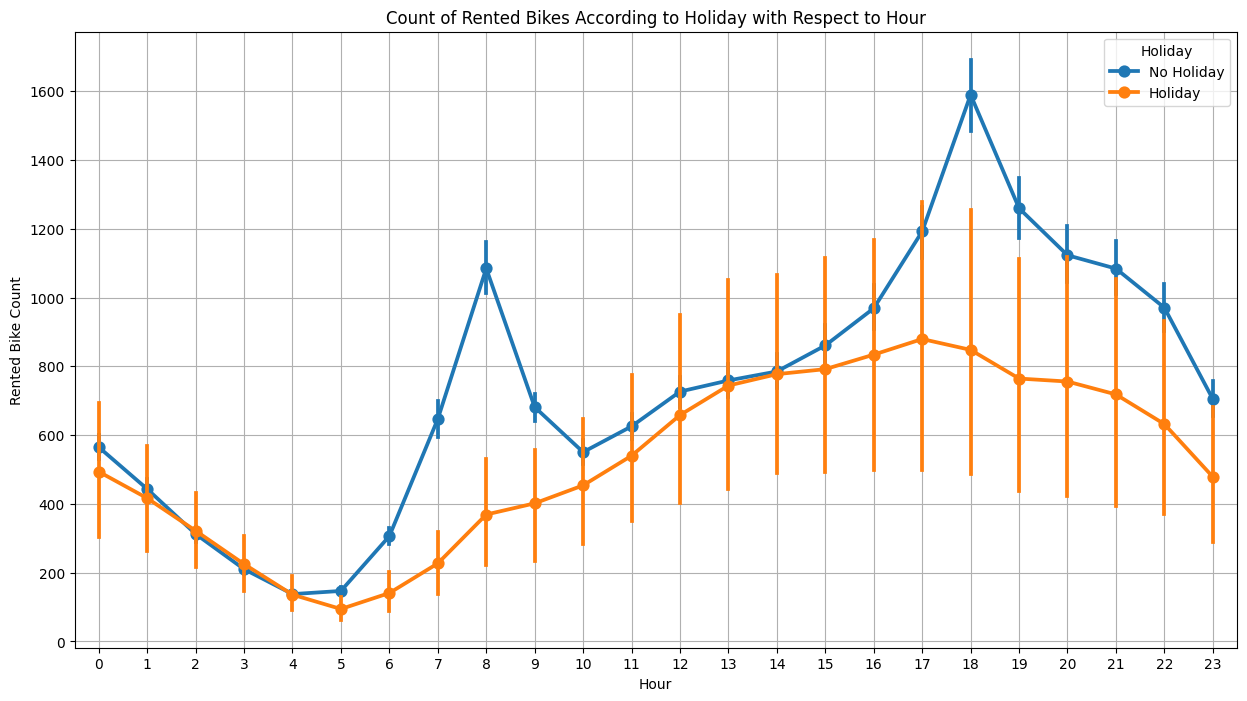

In [32]:
plt.figure(figsize=(15, 8))
sns.pointplot(x='Hour', y='Rented Bike Count', hue='Holiday', data=bike)
plt.title("Count of Rented Bikes According to Holiday with Respect to Hour")
plt.grid(True)
plt.show()

no holiday is shown as blue and holiday is shown as orange.
During holiday season we can see that the demand for renting bike gradually increases during afternoon from 2- 8pm compared to no holiday season. 

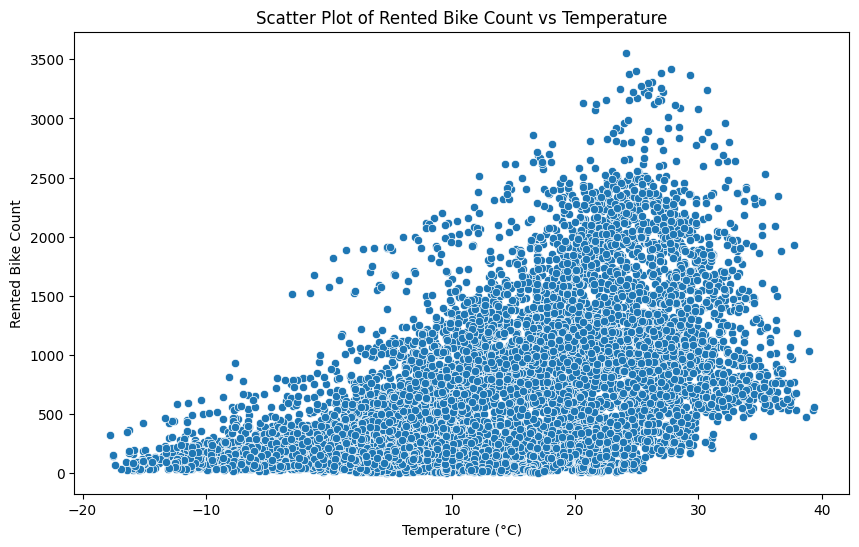

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=bike)
plt.title("Scatter Plot of Rented Bike Count vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rented Bike Count")
plt.show()

 people like to ride bikes when it is pretty hot around 23- 32°C
 (dew point temperature and solar radiation give similar result to temperature.

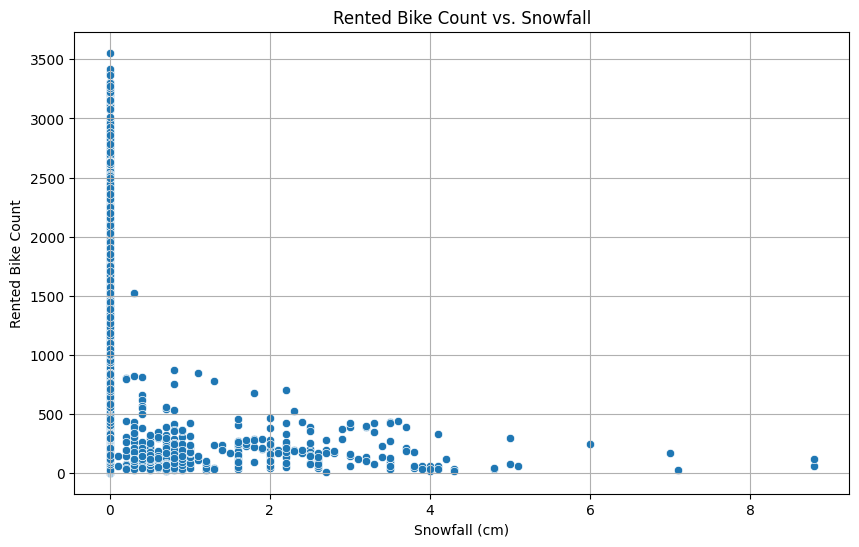

In [36]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='Snowfall (cm)', y='Rented Bike Count', data=bike)

plt.title("Rented Bike Count vs. Snowfall")
plt.xlabel("Snowfall (cm)")
plt.ylabel("Rented Bike Count")
plt.grid(True)
plt.show()

When there is no snowfall, the demand for bike rental is significantly high but the amount of bike rental is very low when there is snowfall. 

In [38]:
numeric_cols = bike.select_dtypes(include=[float, int]).columns

# Create a DataFrame with only numeric columns
numeric_df = bike[numeric_cols]


Temperature and Dew point temperature show very high correlation of 0.91, so I will drop 'dew point temperature as it won't hugely affect analysis.

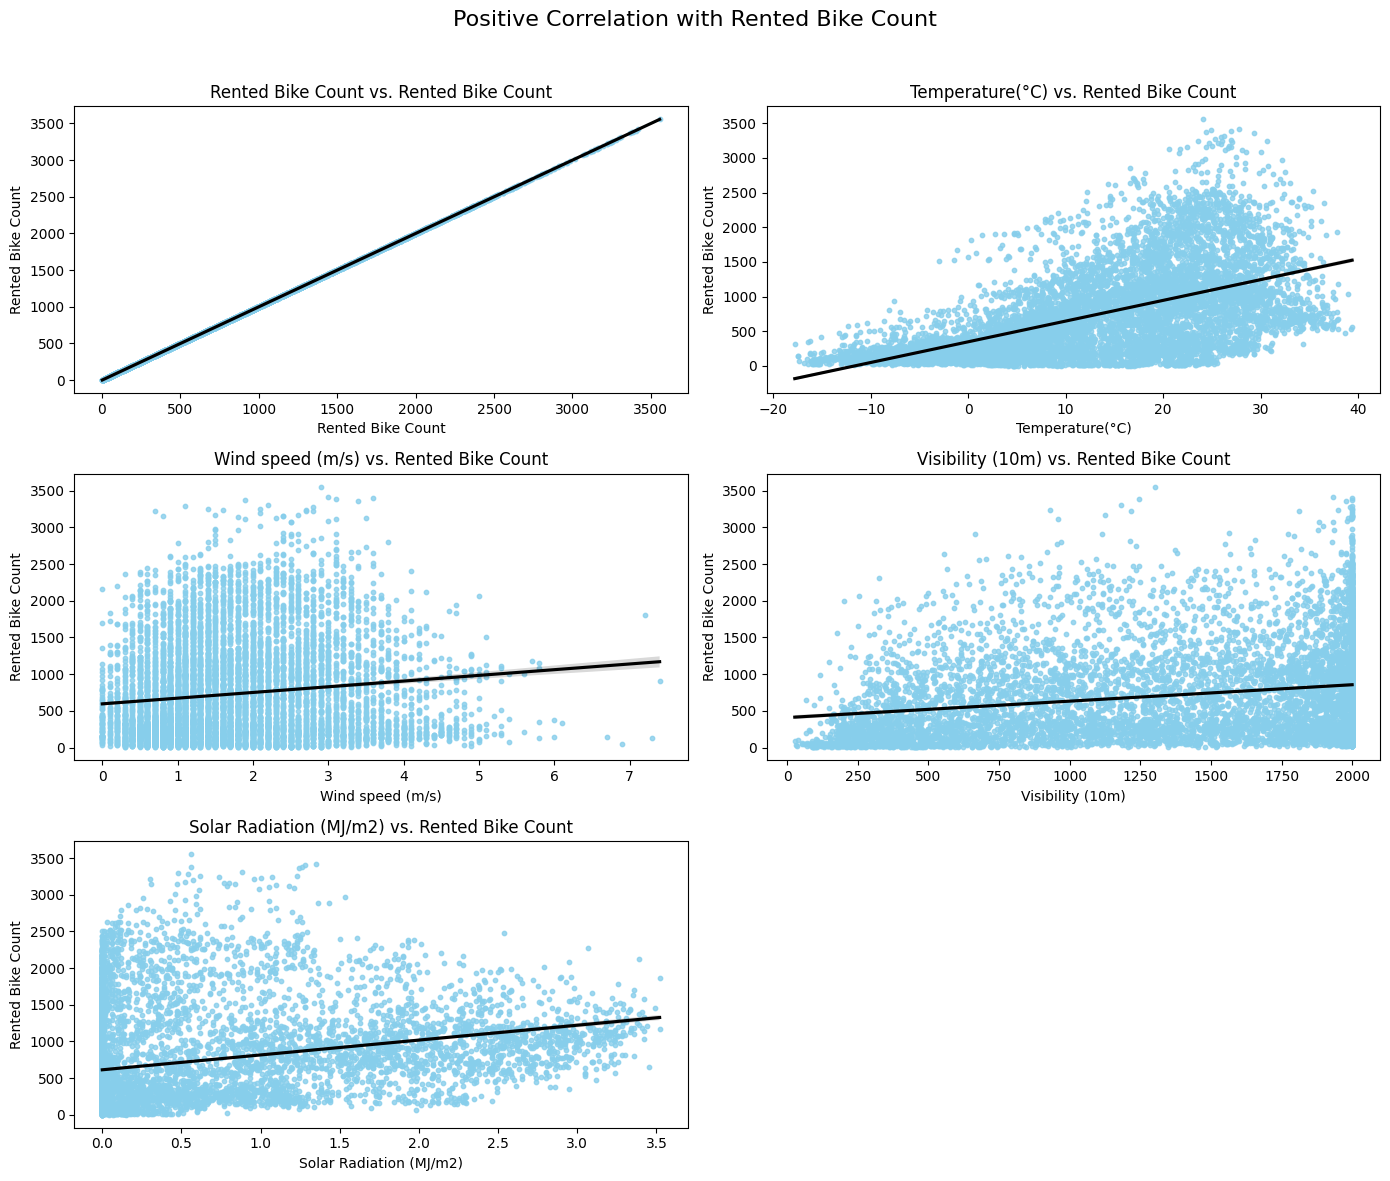

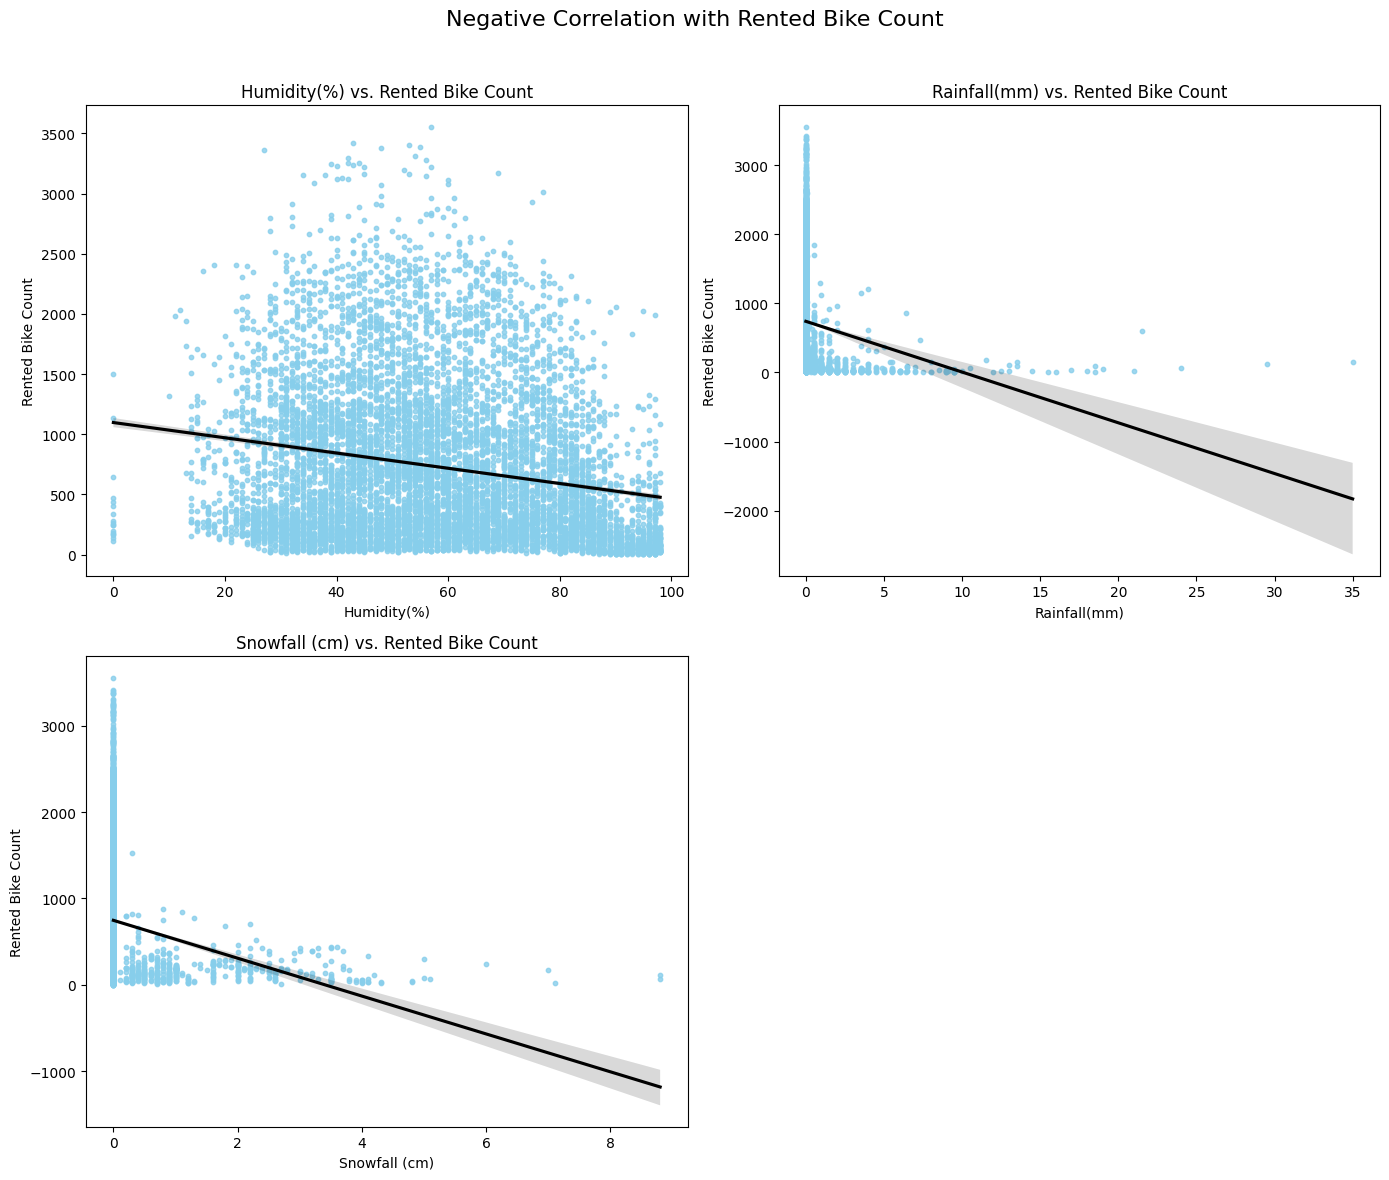

In [40]:
if 'Dew point temperature(°C)' in bike.columns:
    bike = bike.drop(['Dew point temperature(°C)'], axis=1)

# Redefine numerical features after dropping the column
numerical_features = bike.select_dtypes(include=[float, int]).columns

# Calculate the correlation of each numerical feature with 'Rented Bike Count'
correlations = bike[numerical_features].corrwith(bike['Rented Bike Count'])

# Separate the features based on positive and negative correlations
positive_corr_features = correlations[correlations > 0].index
negative_corr_features = correlations[correlations < 0].index

# Function to plot features in a grid
def plot_features(features, title):
    cols = 2
    rows = (len(features) + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(14, 12))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.regplot(x=bike[col], y=bike['Rented Bike Count'], 
                    scatter_kws={"color": 'skyblue', "s": 10}, # Adjust 's' to make dots smaller
                    line_kws={"color": "black"}, 
                    ax=axes[i])
        axes[i].set_title(f'{col} vs. Rented Bike Count')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Rented Bike Count')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot positive correlation features
plot_features(positive_corr_features, 'Positive Correlation with Rented Bike Count')

# Plot negative correlation features
plot_features(negative_corr_features, 'Negative Correlation with Rented Bike Count')

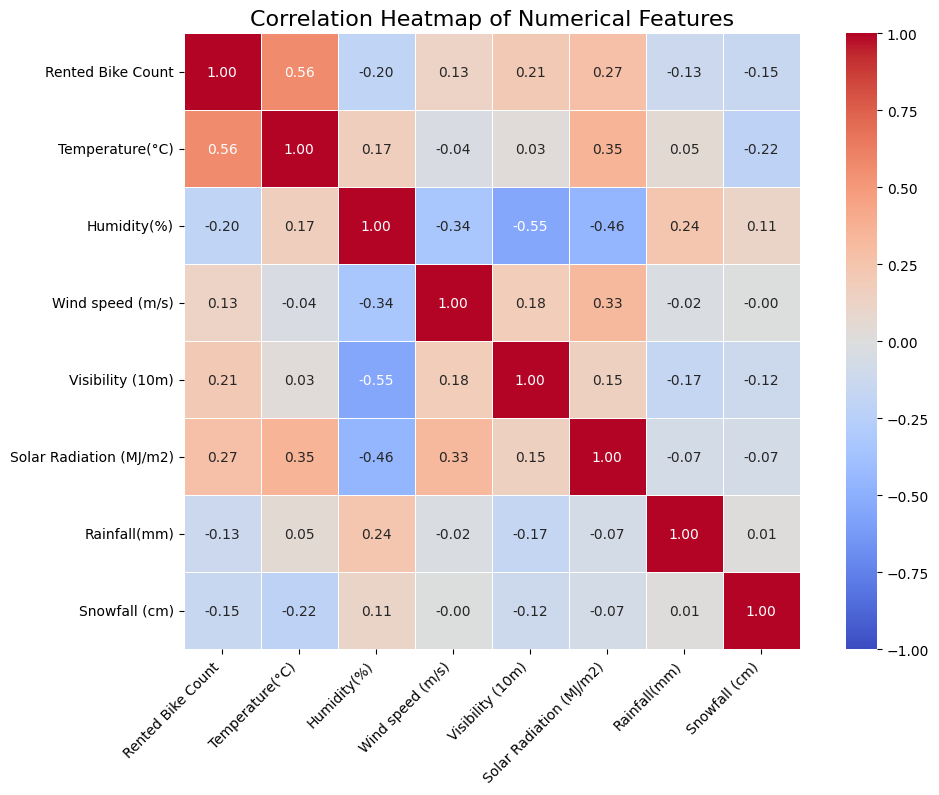

In [41]:
numerical_bike = bike.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numerical_bike.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Feature Engineering

In [43]:
missing_data = bike.isnull().sum()
print(missing_data)

Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
month                      0
weekdays_weekend           0
dtype: int64


In [44]:
# Create dummy variable
#Assign all catagorical features to a variable
categorical_features=list(bike.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'month', 'weekdays_weekend'], dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original
bike_copy = bike.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns you want to encode
categorical_columns = ['Seasons', 'Holiday']  # Add other categorical columns if necessary

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    bike_copy[col] = le.fit_transform(bike_copy[col])

# Display the updated DataFrame
bike_copy.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,0


In [46]:
bike.groupby("Seasons").count()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,month,weekdays_weekend
Seasons,,,,,,,,,,,,
Autumn,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
Spring,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
Summer,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Winter,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


In [47]:
bike_copy.groupby("Seasons").count()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,month,weekdays_weekend
Seasons,,,,,,,,,,,,
0,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
1,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
2,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
3,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


0= Autumn
1= Spring
2= Summer
3= Winter

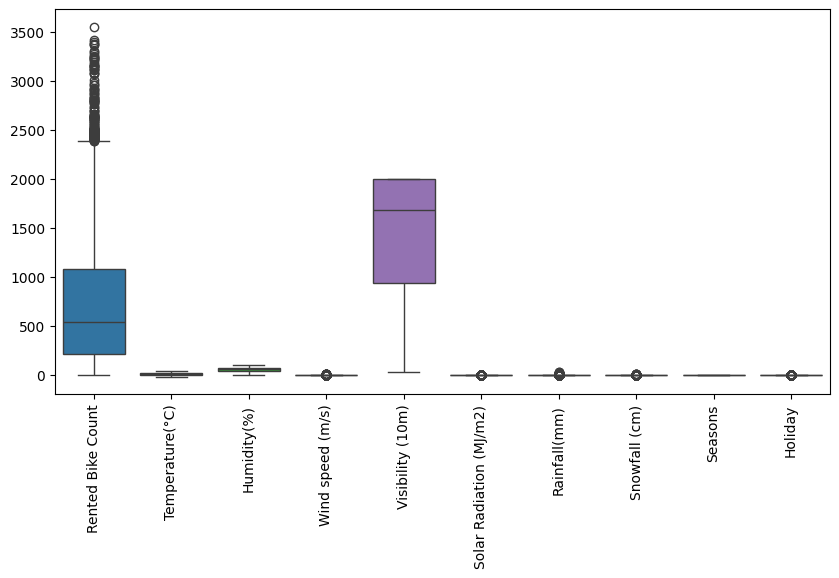

In [49]:
plt.figure(figsize=(10,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = bike_copy)    #box plot of le_df data frame raw data
plt.show()

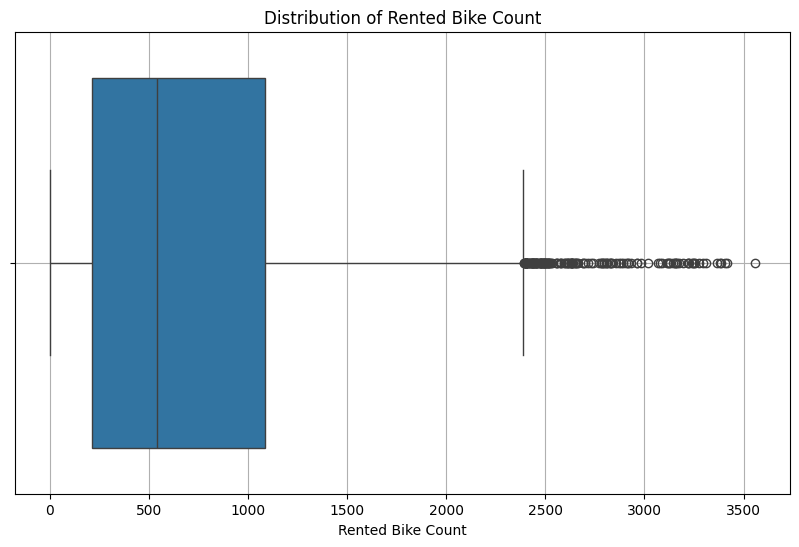

In [50]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x=bike_copy['Rented Bike Count'])

plt.xlabel('Rented Bike Count')
plt.title('Distribution of Rented Bike Count')
plt.grid(True)
plt.show()


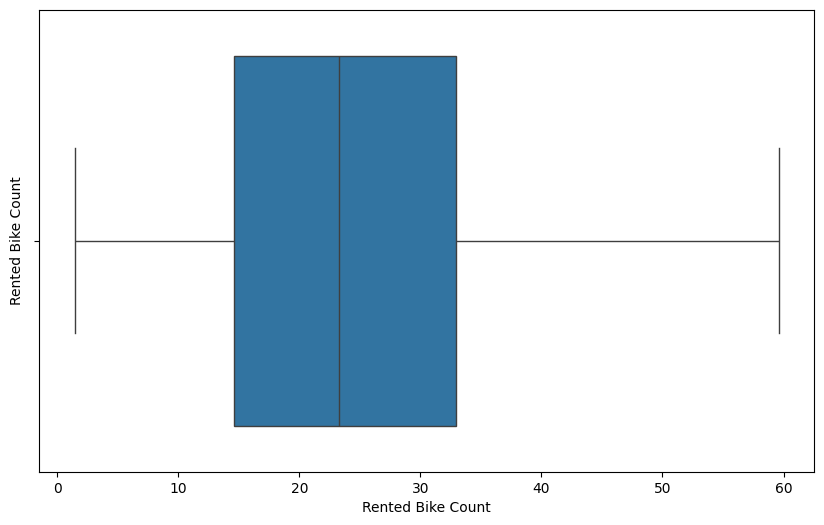

In [51]:
# applying sqrt on Rented Bike Count 
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(bike_copy['Rented Bike Count']))
plt.show()

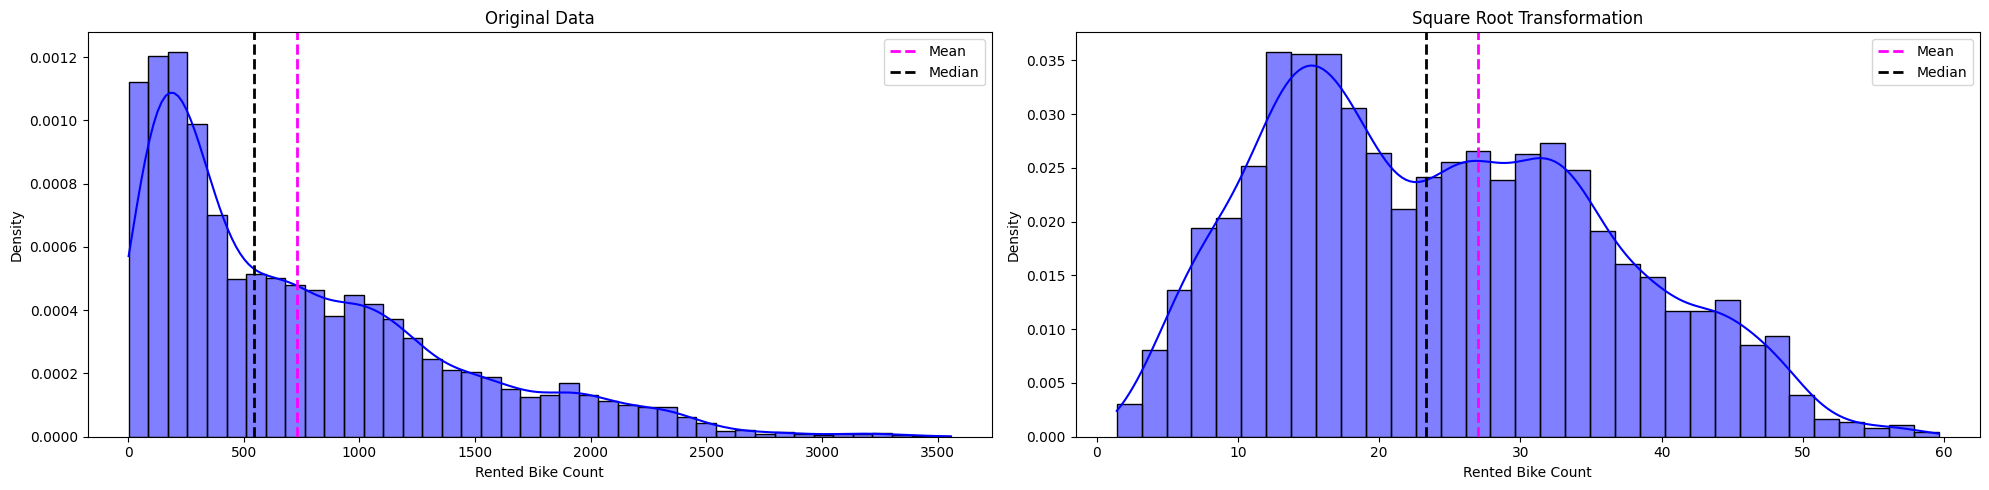

In [52]:
mean_val = bike_copy['Rented Bike Count'].mean()
median_val = bike_copy['Rented Bike Count'].median()

# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot the distribution of 'Rented Bike Count' on the first subplot
sns.histplot(bike_copy['Rented Bike Count'], ax=axes[0], kde=True, color='blue', stat='density')
axes[0].set_title("Original Data")
axes[0].set_ylabel("Density")  # Set y-axis label
# Add lines for mean and median
axes[0].axvline(mean_val, color='magenta', linestyle='dashed', linewidth=2, label='Mean')
axes[0].axvline(median_val, color='black', linestyle='dashed', linewidth=2, label='Median')
axes[0].legend()

# Plot the square root transformation of 'Rented Bike Count' on the second subplot
sns.histplot(np.sqrt(bike_copy['Rented Bike Count']), ax=axes[1], kde=True, color='blue', stat='density')
axes[1].set_title("Square Root Transformation")
axes[1].set_ylabel("Density")  # Set y-axis label
# Add lines for mean and median of the transformed data
axes[1].axvline(np.sqrt(mean_val), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
axes[1].axvline(np.sqrt(median_val), color='black', linestyle='dashed', linewidth=2, label='Median')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

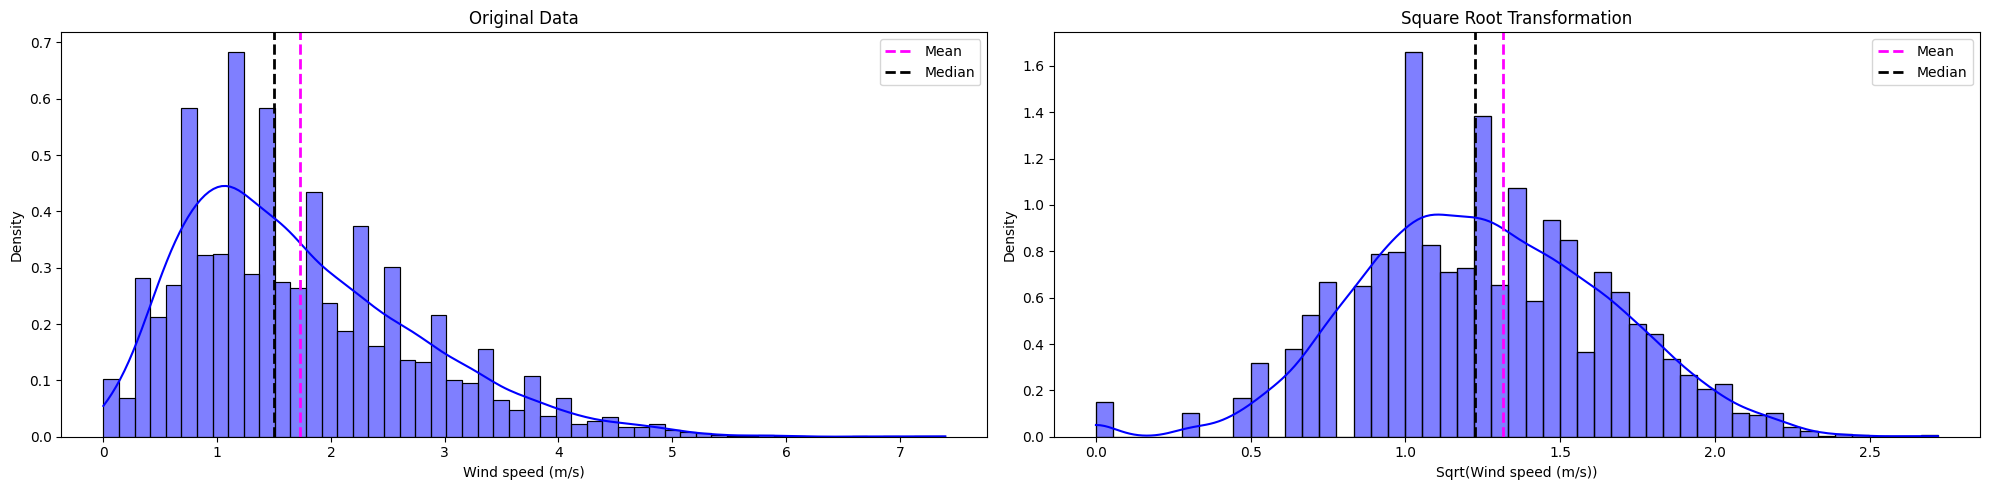

In [54]:
# Calculate mean and median for 'Wind speed (m/s)'
mean_wind_speed = bike_copy['Wind speed (m/s)'].mean()
median_wind_speed = bike_copy['Wind speed (m/s)'].median()

# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot the distribution of 'Wind speed (m/s)' on the first subplot
sns.histplot(bike_copy['Wind speed (m/s)'], ax=axes[0], kde=True, color='blue', stat='density')
axes[0].set_title("Original Data")
axes[0].set_xlabel("Wind speed (m/s)")  # Set x-axis label
axes[0].set_ylabel("Density")  # Set y-axis label
# Add lines for mean and median
axes[0].axvline(mean_wind_speed, color='magenta', linestyle='dashed', linewidth=2, label='Mean')
axes[0].axvline(median_wind_speed, color='black', linestyle='dashed', linewidth=2, label='Median')
axes[0].legend()

# Plot the square root transformation of 'Wind speed (m/s)' on the second subplot
sns.histplot(np.sqrt(bike_copy['Wind speed (m/s)']), ax=axes[1], kde=True, color='blue', stat='density')
axes[1].set_title("Square Root Transformation")
axes[1].set_xlabel("Sqrt(Wind speed (m/s))")  # Set x-axis label
axes[1].set_ylabel("Density")  # Set y-axis label
# Add lines for mean and median of the transformed data
mean_sqrt_wind_speed = np.sqrt(mean_wind_speed)
median_sqrt_wind_speed = np.sqrt(median_wind_speed)
axes[1].axvline(mean_sqrt_wind_speed, color='magenta', linestyle='dashed', linewidth=2, label='Mean')
axes[1].axvline(median_sqrt_wind_speed, color='black', linestyle='dashed', linewidth=2, label='Median')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Model Training (Data Split)

In [56]:
X= bike_copy.drop("Rented Bike Count", axis=1)
y= bike_copy['Rented Bike Count']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6772 entries, 8691 to 7469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Hour                     6772 non-null   category
 1   Temperature(°C)          6772 non-null   float64 
 2   Humidity(%)              6772 non-null   int64   
 3   Wind speed (m/s)         6772 non-null   float64 
 4   Visibility (10m)         6772 non-null   int64   
 5   Solar Radiation (MJ/m2)  6772 non-null   float64 
 6   Rainfall(mm)             6772 non-null   float64 
 7   Snowfall (cm)            6772 non-null   float64 
 8   Seasons                  6772 non-null   int32   
 9   Holiday                  6772 non-null   int32   
 10  month                    6772 non-null   category
 11  weekdays_weekend         6772 non-null   category
dtypes: category(3), float64(5), int32(2), int64(2)
memory usage: 497.1 KB
None


In [59]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6772, 12)
X_test shape: (1693, 12)
y_train shape: (6772,)
y_test shape: (1693,)


### Linear Regression Model

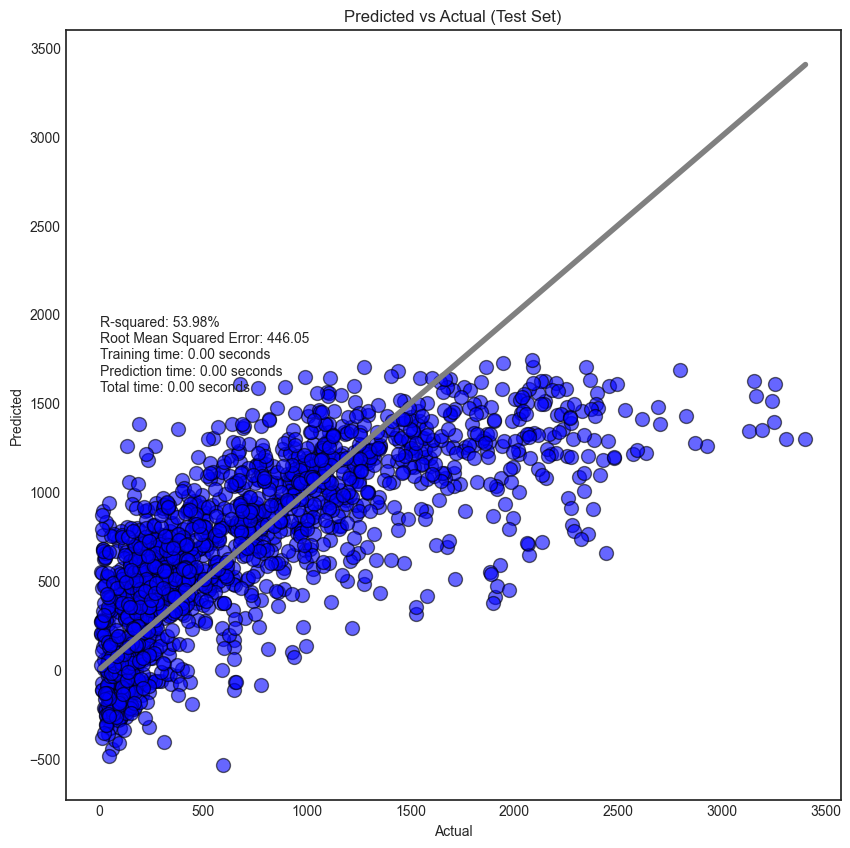

{'Model': 'LinearRegression',
 'R-squared': 0.5398395778363996,
 'RMSE': 446.0485681647894,
 'Training Time': 0.003999233245849609,
 'Prediction Time': 0.0,
 'Total Time': 0.003999233245849609}

In [61]:

import time
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def predict(ml_model, X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    
    # Scaling
    rob = RobustScaler()
    X_train = rob.fit_transform(X_train)
    X_test = rob.transform(X_test)

    # Measure training time
    start_time_train = time.time()
    model = ml_model.fit(X_train, y_train)
    train_time = time.time() - start_time_train

    # Measure prediction time
    start_time_predict = time.time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    predict_time = time.time() - start_time_predict

    # Calculate performance metrics
    r2_score = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 10))
    plt.style.use('seaborn-v0_8-white')
    
    sns.scatterplot(x=y_test, y=y_test_pred, s=100, alpha=0.6, linewidth=1, edgecolor='black', color='blue')
    sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], linewidth=4, color='gray')
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual (Test Set)')
    
    plt.annotate(text=(
        f'R-squared: {"{:.2%}".format(r2_score)}\n'
        f'Root Mean Squared Error: {"{:.2f}".format(rmse)}\n'
        f'Training time: {"{:.2f}".format(train_time)} seconds\n'
        f'Prediction time: {"{:.2f}".format(predict_time)} seconds\n'
        f'Total time: {"{:.2f}".format(train_time + predict_time)} seconds'
    ),
    xy=(0, max(y_test_pred) * 0.9),  # Adjust to fit the plot
    size='medium')
    
    plt.show()

    return {
        'Model': ml_model.__class__.__name__,
        'R-squared': r2_score,
        'RMSE': rmse,
        'Training Time': train_time,
        'Prediction Time': predict_time,
        'Total Time': train_time + predict_time
    }

# LinearRegression
predict(LinearRegression(), X, y)

### Decision Tree Model

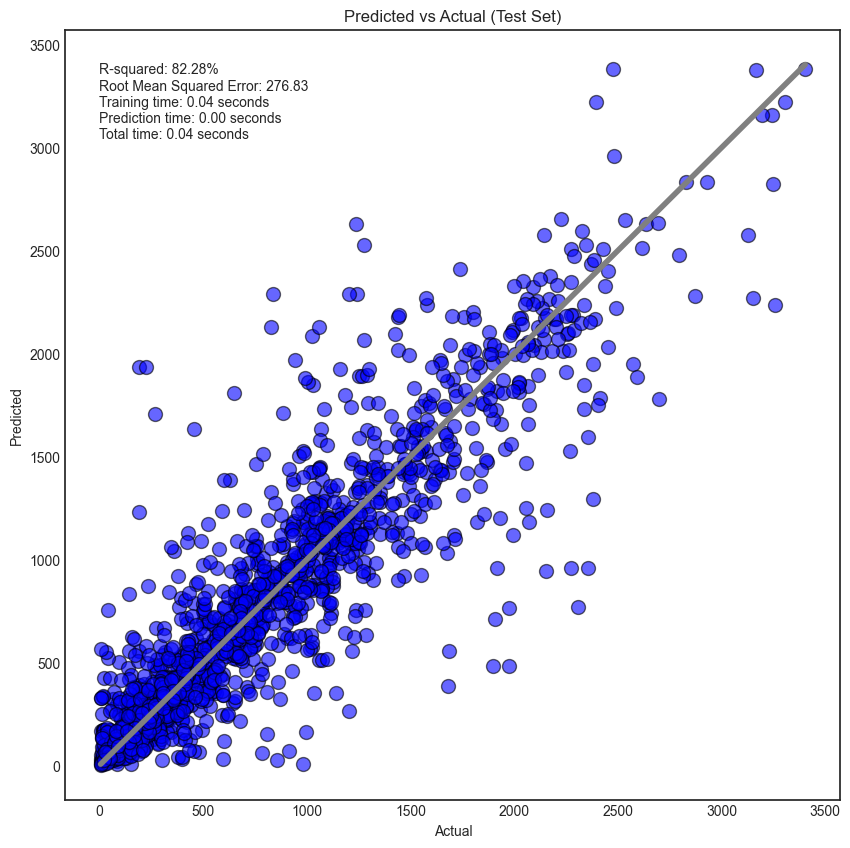

{'Model': 'DecisionTreeRegressor',
 'R-squared': 0.8227528960305648,
 'RMSE': 276.83251113321023,
 'Training Time': 0.042443275451660156,
 'Prediction Time': 0.002000093460083008,
 'Total Time': 0.044443368911743164}

In [63]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),X,y)

### Randomforest Model

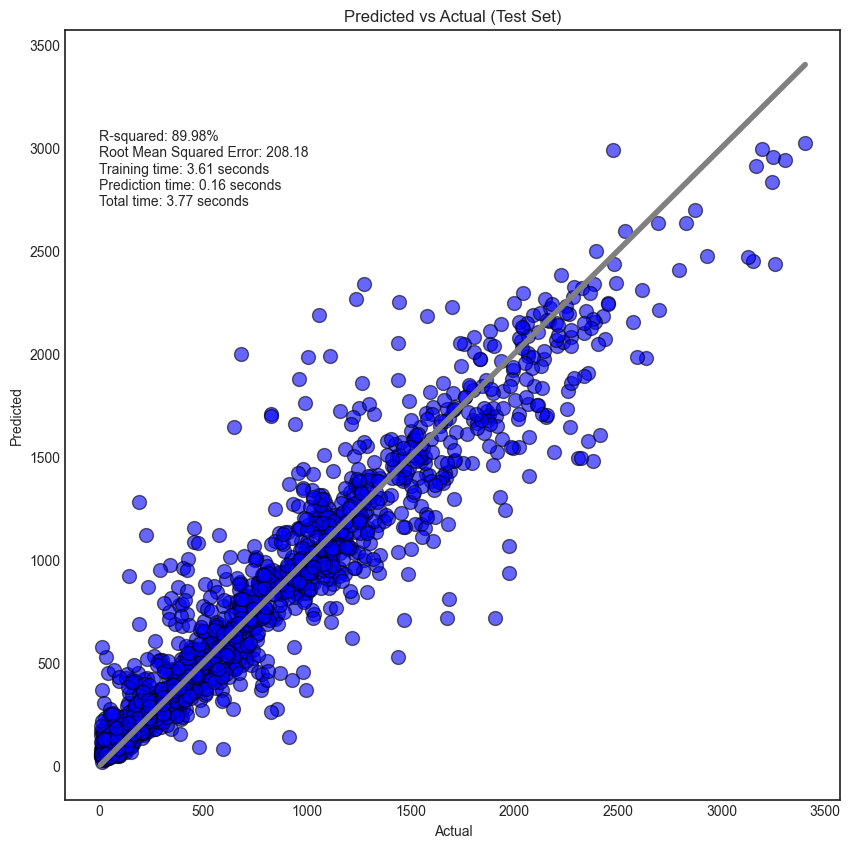

{'Model': 'RandomForestRegressor',
 'R-squared': 0.8997634339187066,
 'RMSE': 208.18076891209634,
 'Training Time': 3.611906051635742,
 'Prediction Time': 0.15844392776489258,
 'Total Time': 3.7703499794006348}

In [65]:
from sklearn.ensemble import RandomForestRegressor
predict (RandomForestRegressor(),X,y)

### Overall Summary including Gradient Boosting model

In [126]:
import time
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Define models (without Gradient Boosting Regressor)
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=78),
    'Random Forest Regression': RandomForestRegressor(random_state=78)
}

# Initialize list to store model data
model_data = []

# Evaluate models
for name, curr_model in models.items():
    curr_model_data = {}
    curr_model_data["Model"] = name
    
    # Measure training time
    start = time.time()
    curr_model.fit(X_train, y_train)
    end = time.time()
    curr_model_data["Training Time (s)"] = end - start
    
    # Predict and evaluate
    y_train_pred = curr_model.predict(X_train)
    y_test_pred = curr_model.predict(X_test)
    
    curr_model_data["Train R^2 Score"] = r2_score(y_train, y_train_pred)
    curr_model_data["Test R^2 Score"] = r2_score(y_test, y_test_pred)
    curr_model_data["Train RMSE Score"] = sqrt(mean_squared_error(y_train, y_train_pred))
    curr_model_data["Test RMSE Score"] = sqrt(mean_squared_error(y_test, y_test_pred))
    
    model_data.append(curr_model_data)

# Create DataFrame from model data
df_all_model = pd.DataFrame(model_data)

# Display the DataFrame
df_all_model

,Model,Training Time (s),Train R^2 Score,Test R^2 Score,Train RMSE Score,Test RMSE Score
0,Linear Regression,0.010745,0.542231,0.539840,431.954531,446.048568
1,Decision Tree Regression,0.074997,1.000000,0.822516,0.000000,277.017147
2,Random Forest Regression,5.386165,0.985159,0.899594,77.776147,208.356182


1. Linear Regression is the fastest but has the lowest accuracy.
2. Decision Tree overfits the training data (perfect score) but generalizes reasonably well to the test data.
3. Random Forest has the best performance, with a good balance between training and test scores, but takes the longest to train.


In [128]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import time
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

# Define parameter grids for each model (excluding Gradient Boosting Regressor)
param_grids = {
    'Decision Tree Regression': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest Regression': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

# Initialize models (excluding Gradient Boosting Regressor)
models = {
    'Decision Tree Regression': DecisionTreeRegressor(random_state=78),
    'Random Forest Regression': RandomForestRegressor(random_state=78)
}

# Dictionary to store the best models
best_models = {}

# Perform hyperparameter tuning
for name, model in models.items():
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=10,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=78
    )
    random_search.fit(X_train, y_train)
    best_models[name] = random_search.best_estimator_

# Store the results in a DataFrame
model_data = []
for name, model in best_models.items():
    curr_model_data = {}
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    curr_model_data["Model"] = name
    curr_model_data["Training Time (s)"] = end - start
    curr_model_data["Train R^2 Score"] = model.score(X_train, y_train)
    curr_model_data["Test R^2 Score"] = model.score(X_test, y_test)
    curr_model_data["Train RMSE Score"] = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    curr_model_data["Test RMSE Score"] = sqrt(mean_squared_error(y_test, model.predict(X_test)))
    model_data.append(curr_model_data)

# Create DataFrame from model data
df_all_model = pd.DataFrame(model_data)

# Display the DataFrame
df_all_model

,Model,Training Time (s),Train R^2 Score,Test R^2 Score,Train RMSE Score,Test RMSE Score
0,Decision Tree Regression,0.027240,0.894610,0.834819,207.259404,267.243538
1,Random Forest Regression,7.568215,0.985802,0.900300,76.073115,207.622565


Decision Tree Regression improved in terms of better handling overfitting, with a more balanced performance between training and test data.
Random Forest Regression saw slight improvements in both training and test scores, indicating more refined tuning.


# Evaluation

In [130]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the models (excluding Gradient Boosting Regressor)
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=78),
    'Random Forest Regression': RandomForestRegressor(random_state=78)
}

# Initialize list to store cross-validation results
cv_results = []

# Perform k-fold cross-validation for each model
kf = KFold(n_splits=5, shuffle=True, random_state=78)

for name, model in models.items():
    curr_cv_results = {}
    curr_cv_results['Model'] = name
    
    # Perform cross-validation
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))
    
    # Calculate mean and standard deviation of R² and RMSE
    curr_cv_results['Mean R² Score'] = r2_scores.mean()
    curr_cv_results['R² Score Std'] = r2_scores.std()
    curr_cv_results['Mean RMSE Score'] = rmse_scores.mean()
    curr_cv_results['RMSE Score Std'] = rmse_scores.std()
    
    cv_results.append(curr_cv_results)

# Create DataFrame from cross-validation results
df_cv_results = pd.DataFrame(cv_results)

# Display the DataFrame
df_cv_results

,Model,Mean R² Score,R² Score Std,Mean RMSE Score,RMSE Score Std
0,Linear Regression,0.540064,0.012736,435.347529,12.286052
1,Decision Tree Regression,0.796044,0.005027,289.937003,8.894118
2,Random Forest Regression,0.896764,0.004995,206.207644,7.100493


Random Forest Regression has the highest mean R² score and the lowest mean RMSE score, indicating the best overall performance.
Decision Tree Regression show strong performance but with slightly higher errors compared to Random Forest.
Linear Regression performs the least well, with the highest errors and lower explained variance.
These results suggest that Random Forest Regression is likely the best model among those tested, followed by Decision Tree, and Linear Regression.

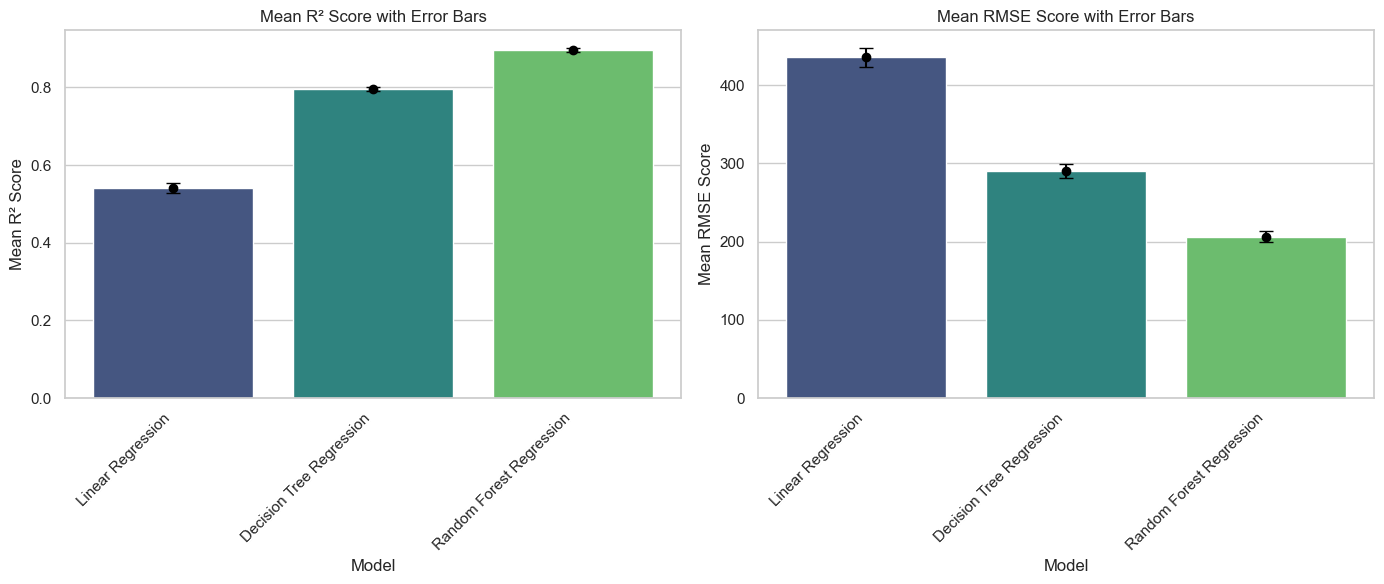

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from the k-fold cross-validation results without Gradient Boosting Regression
cv_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression'],
    'Mean R² Score': [0.540064, 0.796044, 0.896764],
    'R² Score Std': [0.012736, 0.005027, 0.004995],
    'Mean RMSE Score': [435.347529, 289.937003, 206.207644],
    'RMSE Score Std': [12.286052, 8.894118, 7.100493]
})

# Set Seaborn style
sns.set(style="whitegrid")

# Plot Mean R² Score with Error Bars
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=cv_results, x='Model', y='Mean R² Score', ci=None, palette='viridis')
plt.errorbar(cv_results['Model'], cv_results['Mean R² Score'], yerr=cv_results['R² Score Std'], fmt='o', color='black', capsize=5)
plt.xticks(rotation=45, ha='right')
plt.title('Mean R² Score with Error Bars')
plt.ylabel('Mean R² Score')

# Plot Mean RMSE Score with Error Bars
plt.subplot(1, 2, 2)
sns.barplot(data=cv_results, x='Model', y='Mean RMSE Score', ci=None, palette='viridis')
plt.errorbar(cv_results['Model'], cv_results['Mean RMSE Score'], yerr=cv_results['RMSE Score Std'], fmt='o', color='black', capsize=5)
plt.xticks(rotation=45, ha='right')
plt.title('Mean RMSE Score with Error Bars')
plt.ylabel('Mean RMSE Score')

plt.tight_layout()
plt.show()

Random Forrest Regression and gradient boosting regression model both shows highest mean R^2 score of 0.90 and 0.86, which means these models show the variance in the data well.
Whereas linear regression model shows highest mean RMSE of 435 which represent this model gives highest error.